**Liver Disease Prediction - Using Machine Learning**





## **Install** & **Importing** **the** **Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## **Extract** **the** **Data**-**Set** ( **Liver_Disease**.**csv** )

In [ ]:
liver=pd.read_csv('/content/indian_liver_patient (2).csv')

In [ ]:
liver.shape

(583, 11)

In [ ]:
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
liver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
liver.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


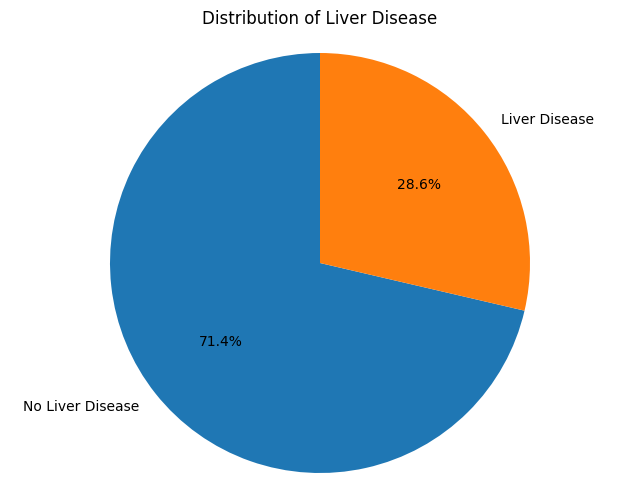

In [ ]:


# Check the distribution of liver disease
liver_disease_counts = liver['Dataset'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(liver_disease_counts, labels=['No Liver Disease', 'Liver Disease'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Liver Disease')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Performing Exploitory Data Analysis ( EDA )**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 1. Missing Values
print("Missing Values:")
print(liver.isnull().sum())

Missing Values:
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [ ]:
# 2. Data Types
print("\nData Types:")
print(liver.dtypes)


Data Types:
Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object


In [ ]:

# 3. Descriptive Statistics
print("\nDescriptive Statistics:")
print(liver.describe())



Descriptive Statistics:
              Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  583.000000       583.000000        583.000000            583.000000   
mean    44.746141         3.298799          1.486106            290.576329   
std     16.189833         6.209522          2.808498            242.937989   
min      4.000000         0.400000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            175.500000   
50%     45.000000         1.000000          0.300000            208.000000   
75%     58.000000         2.600000          1.300000            298.000000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                583.000000                  583.000000      583.000000   
mean                  80.713551                  109.910806        6.483190   
std                  182.620356    

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')


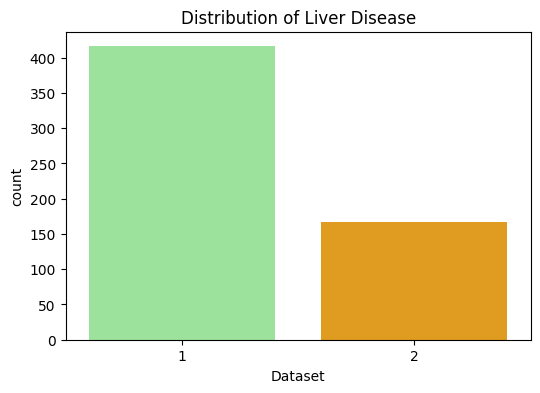

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a CSV file named 'liver_data.csv'
liver = pd.read_csv('/content/indian_liver_patient (2).csv') # Load your data into the 'liver' DataFrame

# Print the column names to verify the target variable column name
print(liver.columns)

# 4. Distribution of Target Variable
plt.figure(figsize=(6, 4))
# Replace 'Dataset' with the actual column name if it's different
sns.countplot(x='Dataset', data=liver, palette={'1': 'lightgreen', '2': 'orange'})# or sns.countplot(x='actual_column_name', data=liver)
plt.title('Distribution of Liver Disease')
plt.show()

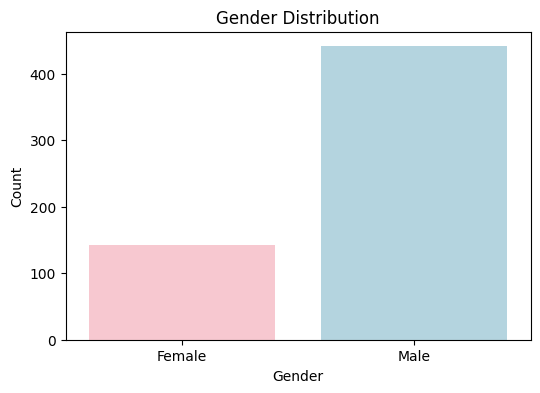

In [ ]:
# 5. Gender Distribution
# Gender Distribution
plt.figure(figsize=(6, 4))

# Specify colors for male and female
sns.countplot(x='Gender', data=liver, palette={'Male': 'lightblue', 'Female': 'pink'})

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


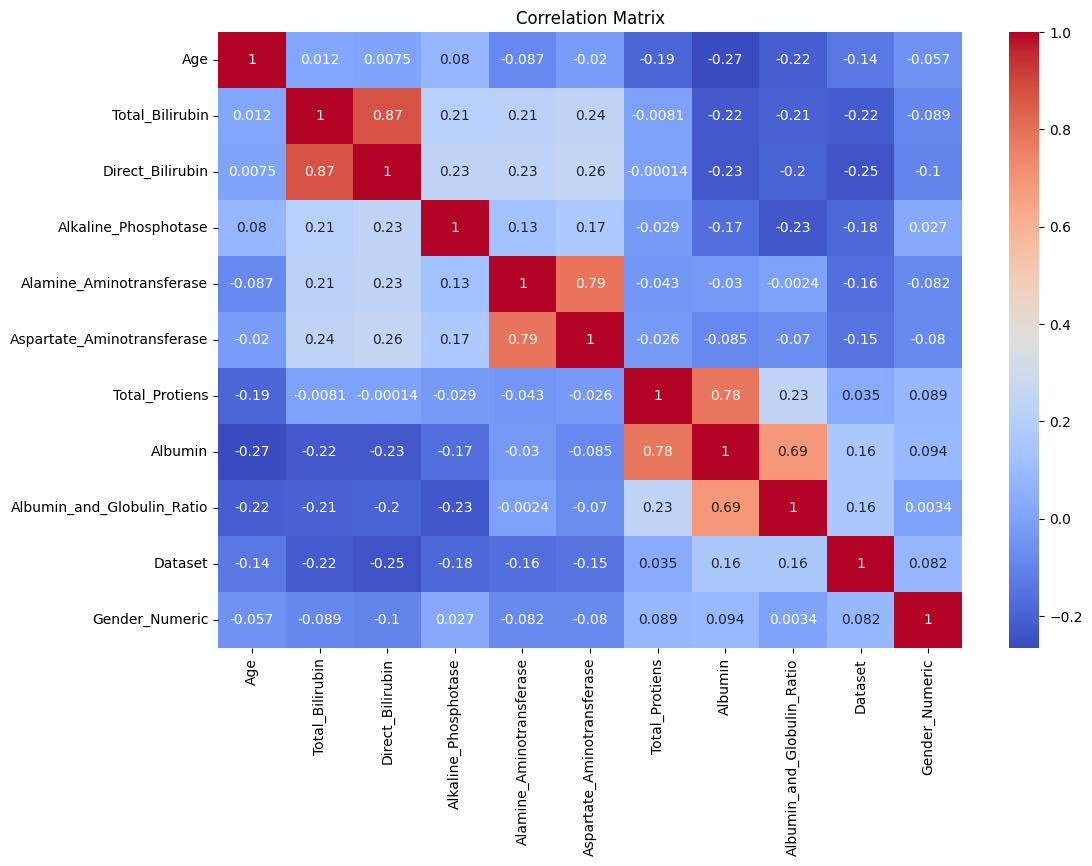

In [ ]:
# 6. Correlation Matrix
liver['Gender_Numeric'] = liver['Gender'].map({'Male': 0, 'Female': 1})  # Replace with your actual gender values

plt.figure(figsize=(12, 8))
# Use only numerical columns for correlation
numerical_cols = liver.select_dtypes(include=np.number).columns
sns.heatmap(liver[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

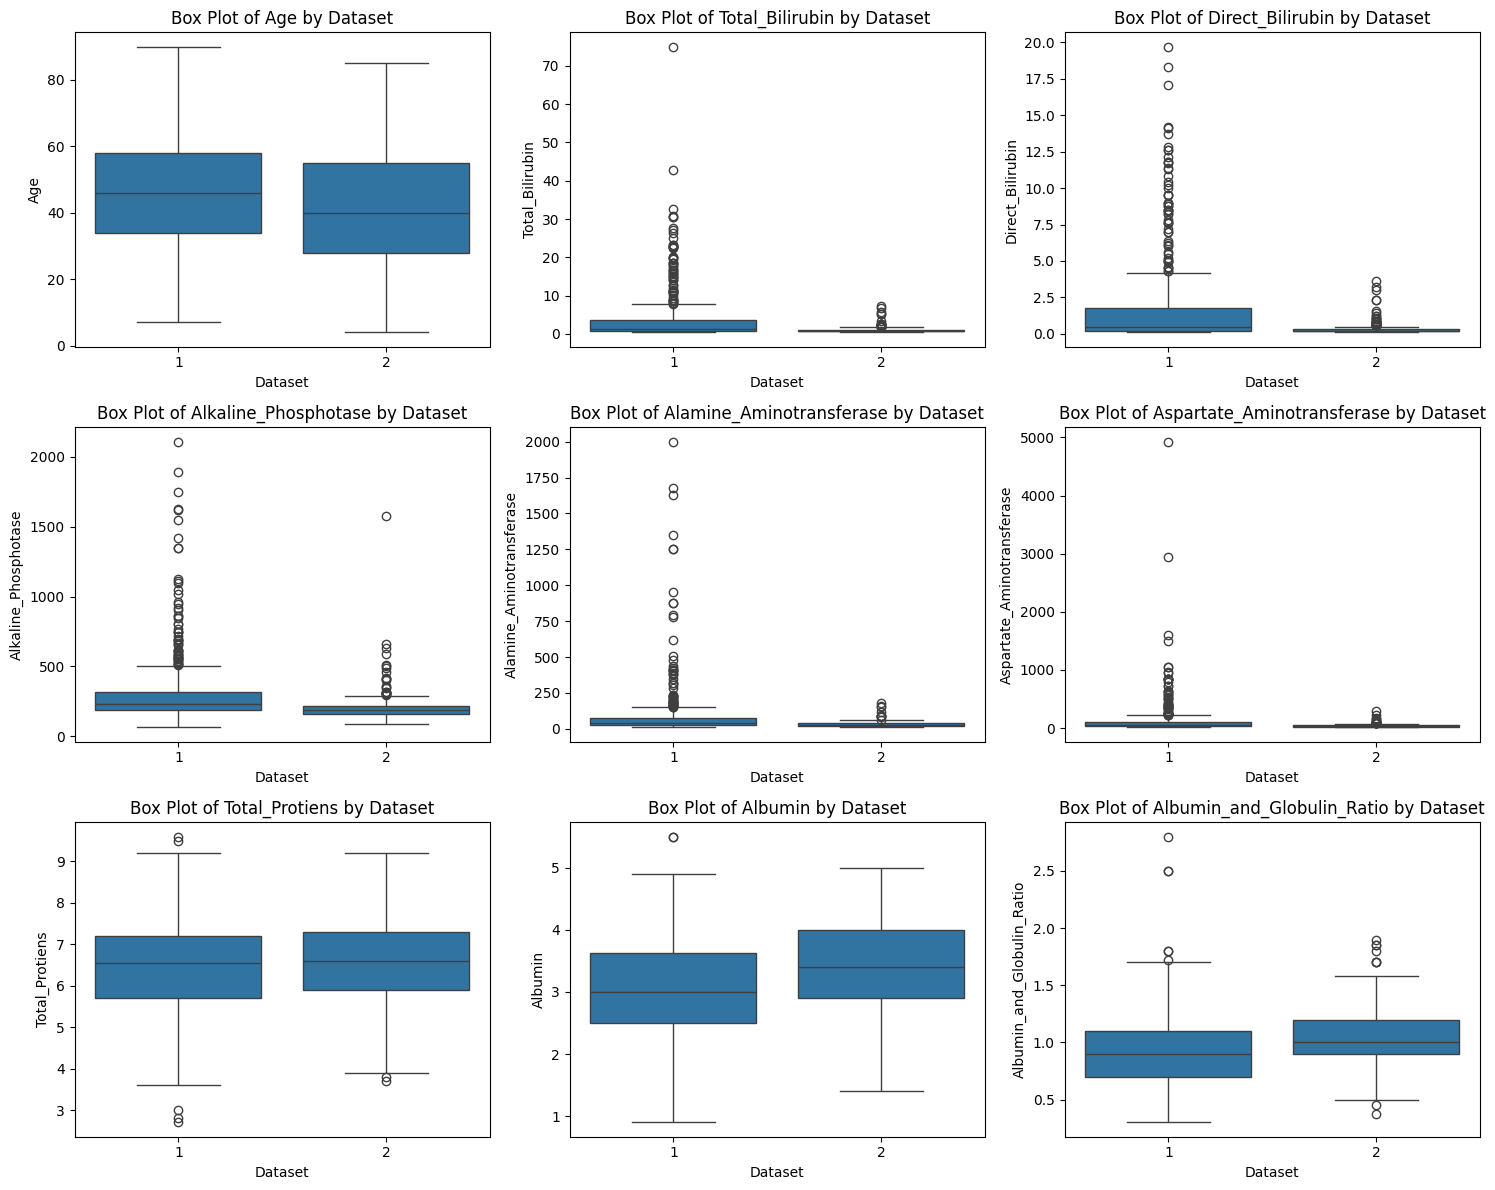

In [ ]:
# Set up the number of rows and columns for subplots
num_features = len(numerical_features)
num_cols = 3  # You can adjust this for more or fewer columns
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate

# Generate box plots
for i, feature in enumerate(numerical_features):
    sns.boxplot(x='Dataset', y=feature, data=liver, ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature} by Dataset')
    axes[i].set_xlabel('Dataset')
    axes[i].set_ylabel(feature)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


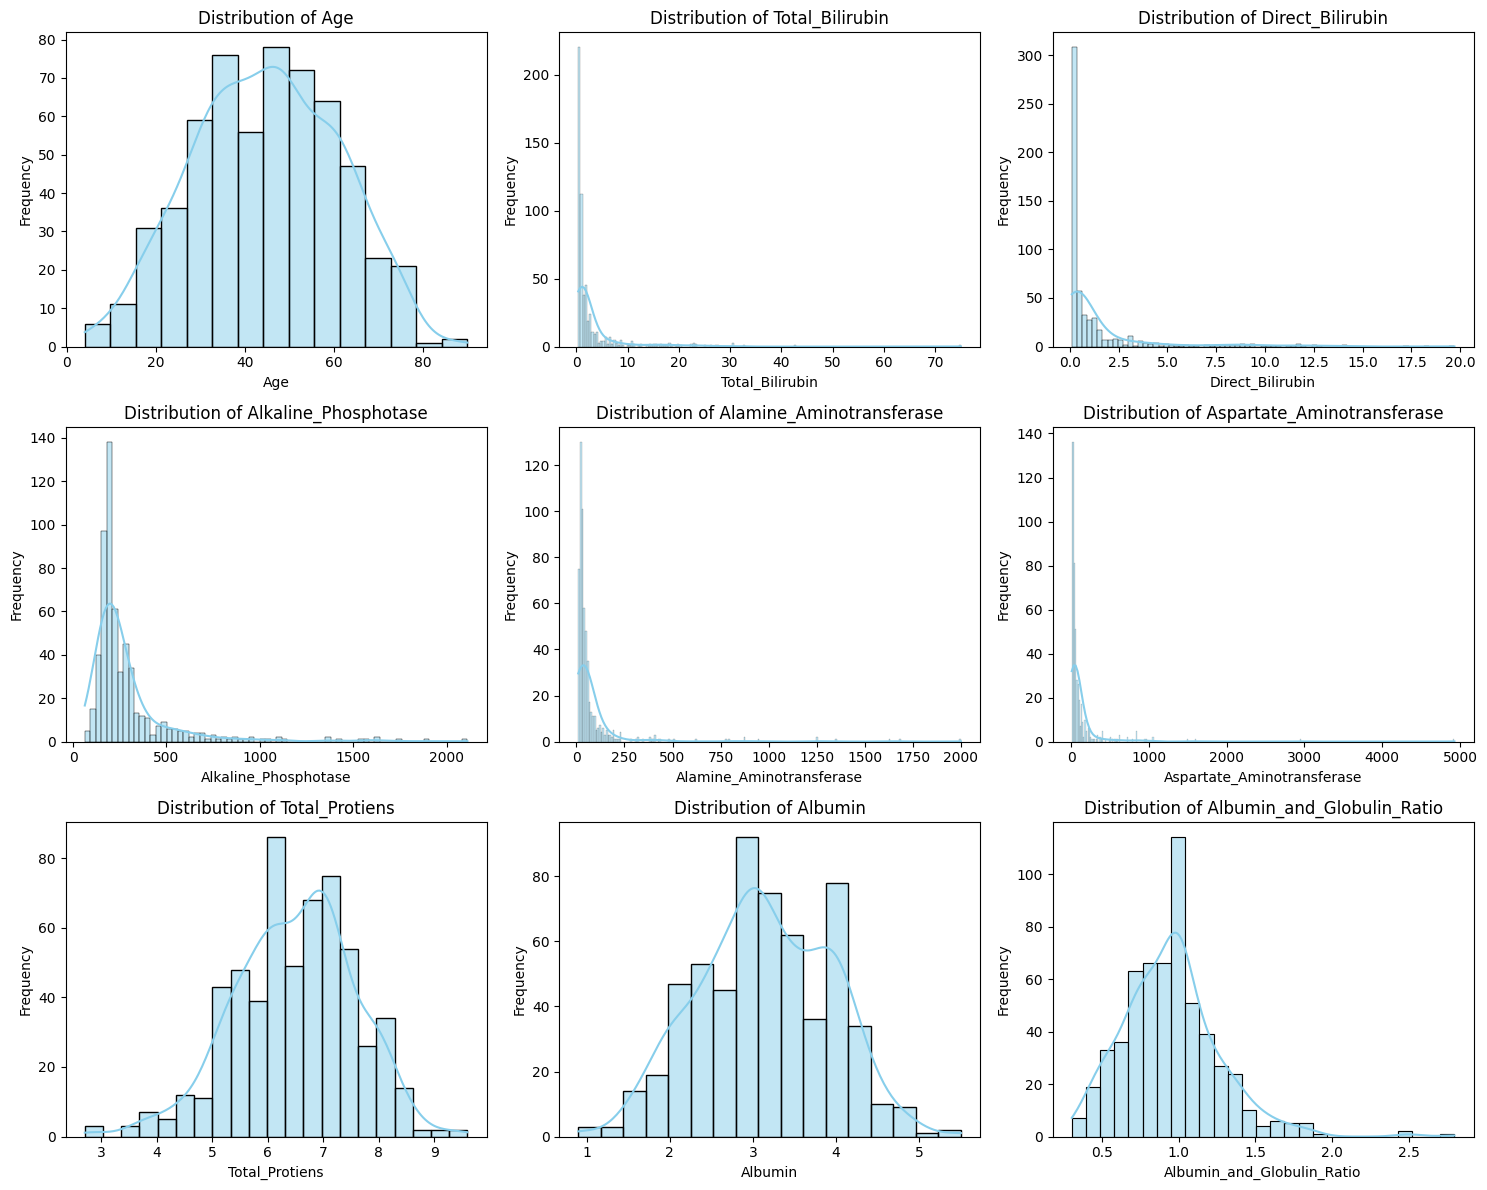

In [ ]:
# Set up the number of rows and columns for subplots
num_features = len(numerical_features)
num_cols = 3  # Adjust this for more or fewer columns
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate

# Generate histograms with KDE
for i, feature in enumerate(numerical_features):
    sns.histplot(liver[feature], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


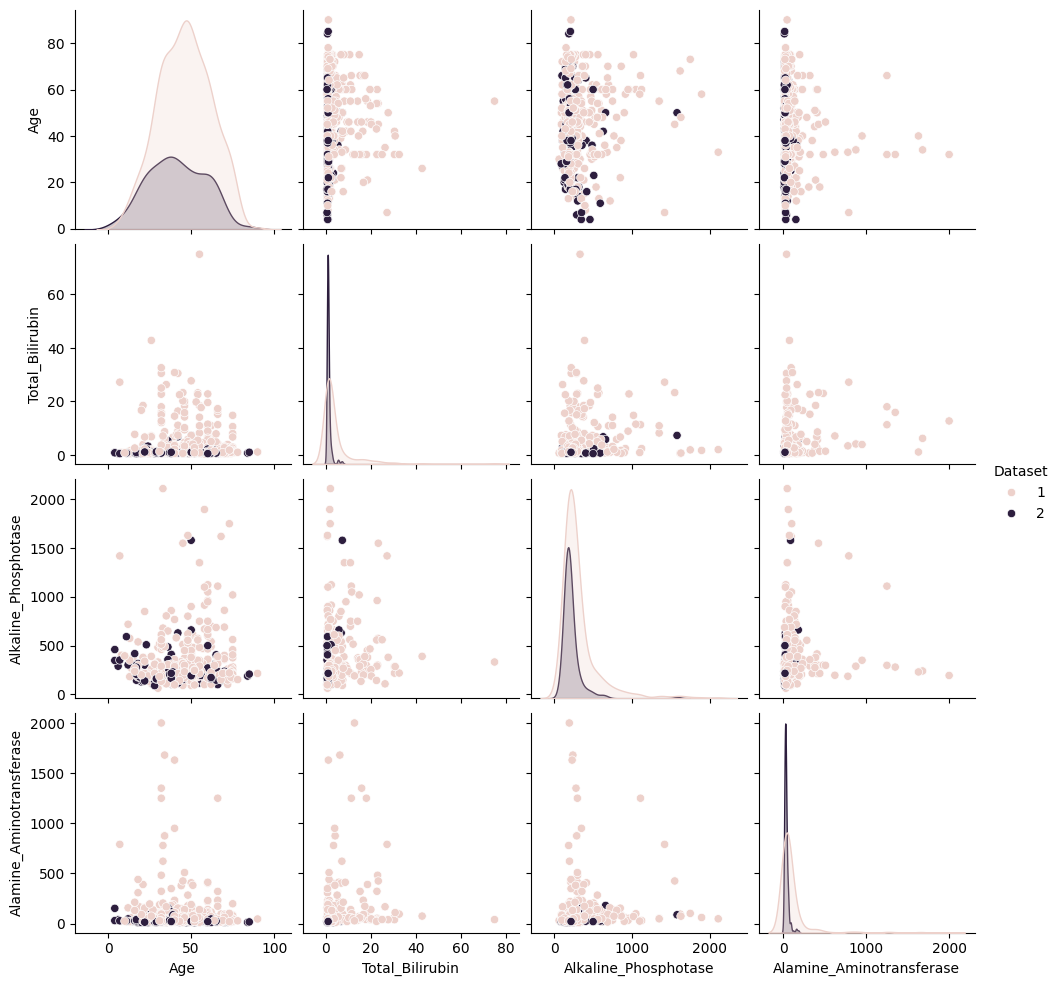

In [ ]:
# 9. Pair Plot for Selected Features
sns.pairplot(liver[['Age', 'Total_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Dataset']], hue='Dataset')
plt.show()

**Performing Data PreProcessing**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
liver=pd.read_csv('/content/indian_liver_patient (2).csv')
# 1. Missing Values
print("Missing Values:")
print(liver.isnull().sum())


Missing Values:
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [ ]:

# Replace missing values with the median (for numerical columns)
# You can also choose other strategies like mean, mode, or imputation methods
for column in liver.columns:
    if liver[column].dtype == 'float64' or liver[column].dtype == 'int64':
        liver[column].fillna(liver[column].median(), inplace=True)

In [ ]:
# Verify that missing values are handled
print("\nMissing Values after handling:")
print(liver.isnull().sum())


Missing Values after handling:
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


In [ ]:
# Verify data types
print("\nData Types after handling:")
print(liver.dtypes)


Data Types after handling:
Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object


In [ ]:
# View descriptive statistics after handling
print("\nDescriptive Statistics after handling:")
print(liver.describe())


Descriptive Statistics after handling:
              Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  583.000000       583.000000        583.000000            583.000000   
mean    44.746141         3.298799          1.486106            290.576329   
std     16.189833         6.209522          2.808498            242.937989   
min      4.000000         0.400000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            175.500000   
50%     45.000000         1.000000          0.300000            208.000000   
75%     58.000000         2.600000          1.300000            298.000000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                583.000000                  583.000000      583.000000   
mean                  80.713551                  109.910806        6.483190   
std                 

**Analysing distribution of each and every column**

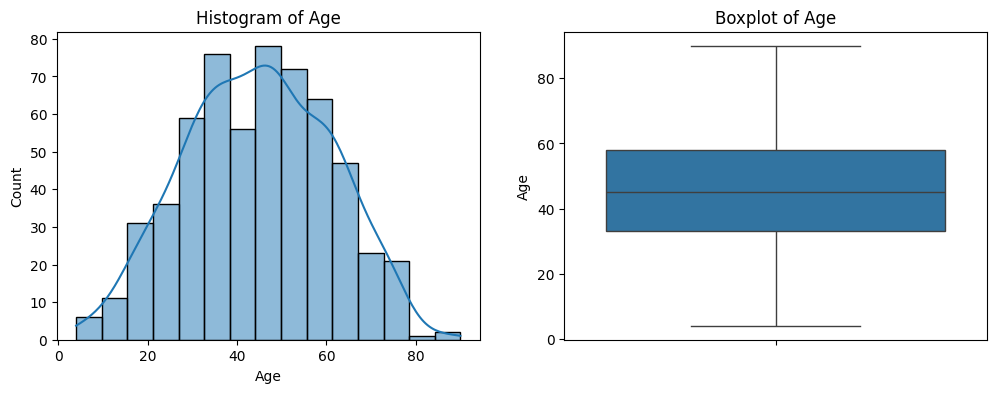

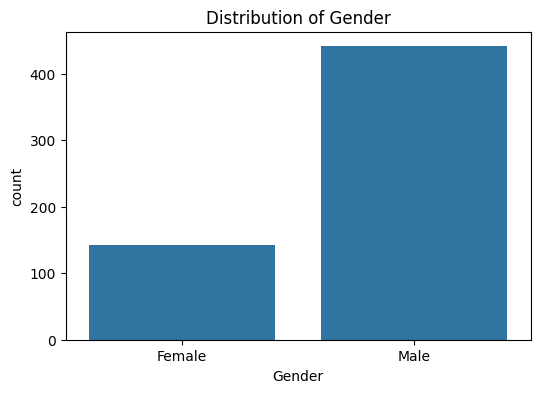

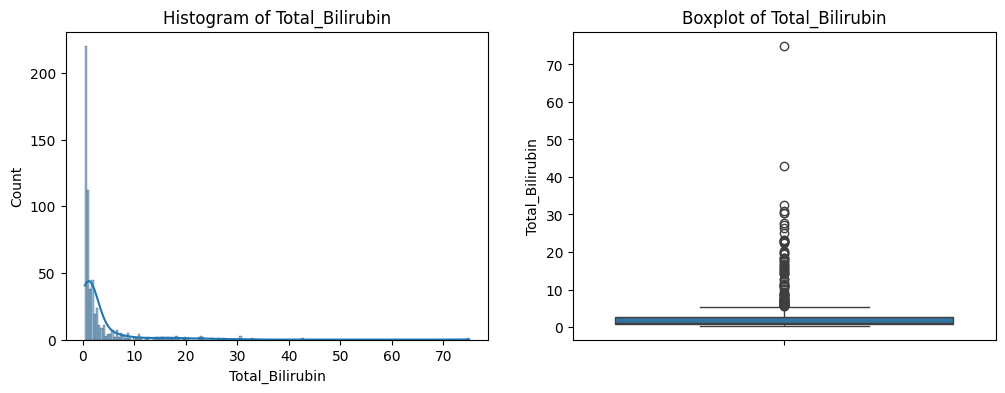

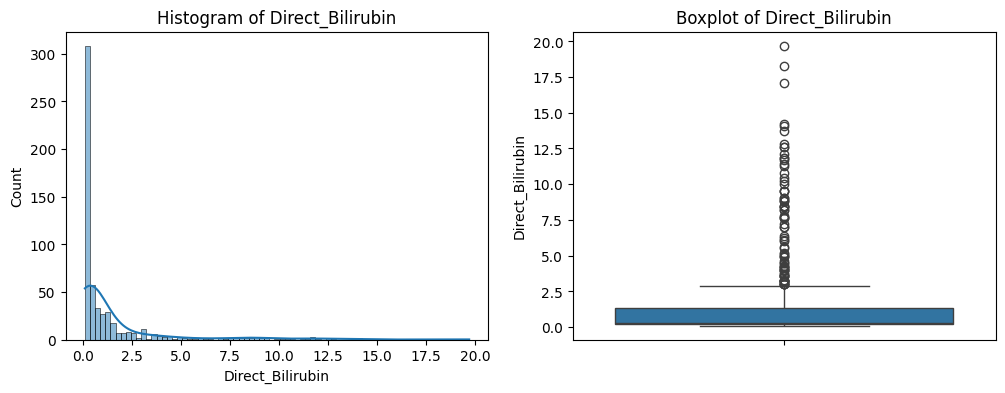

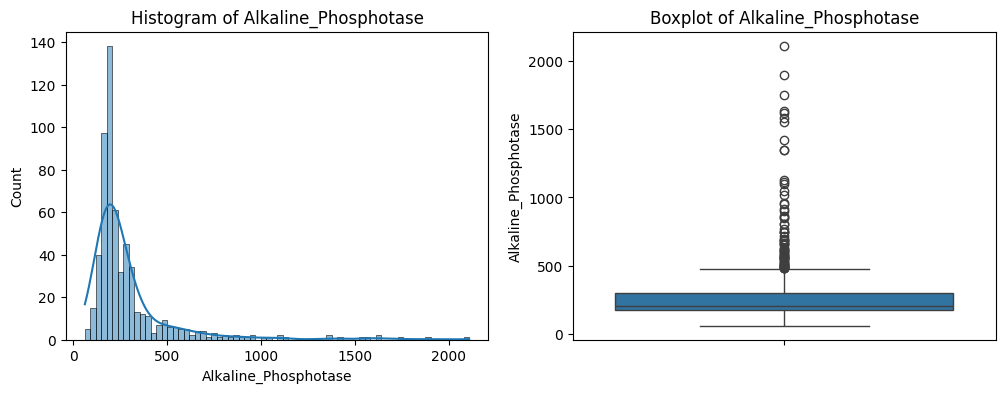

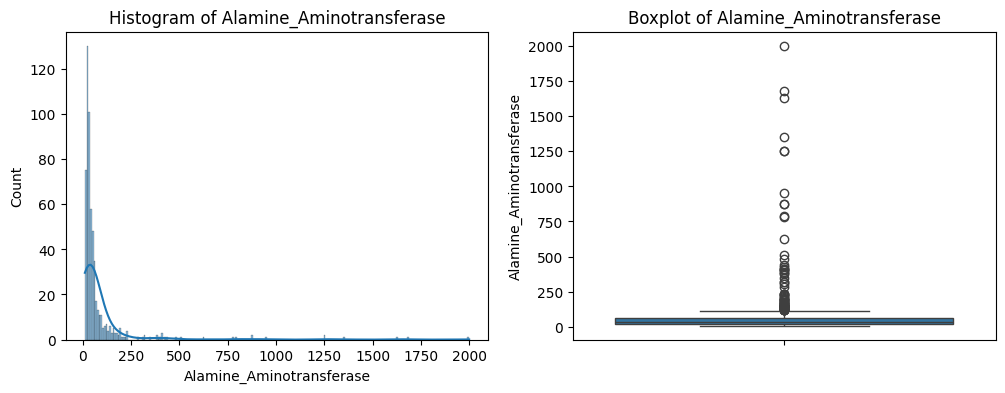

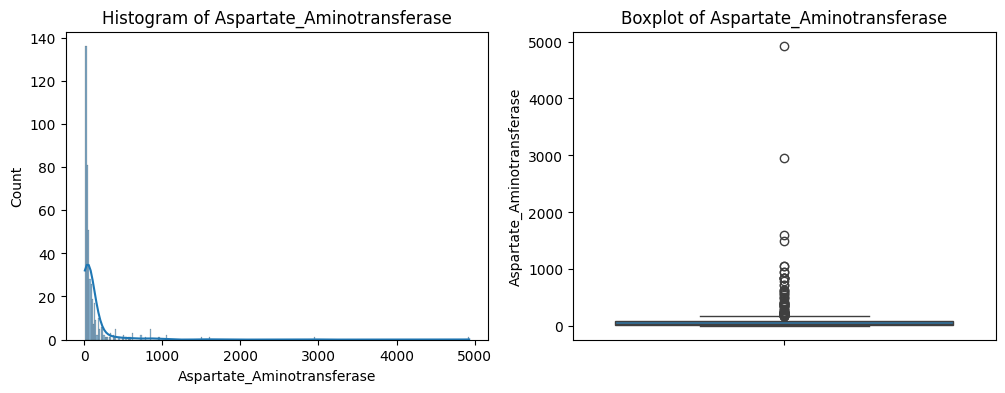

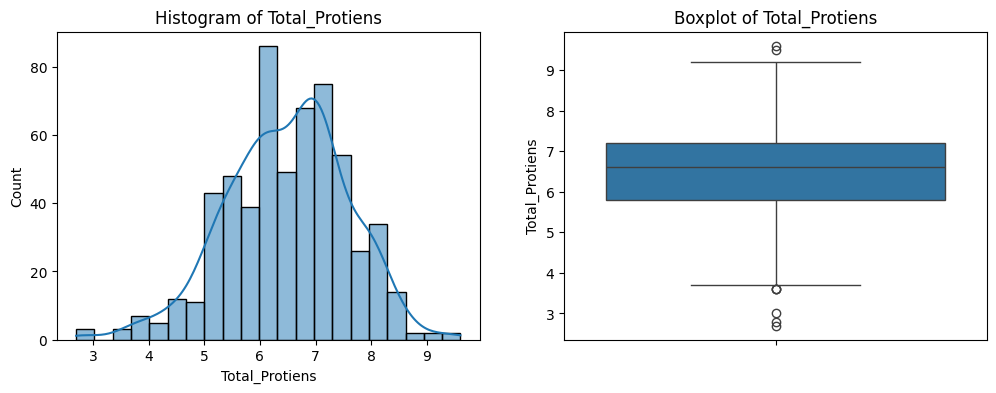

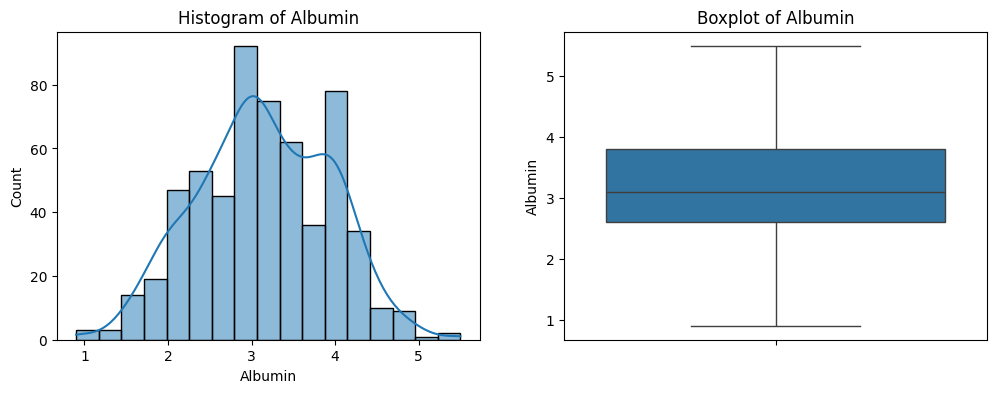

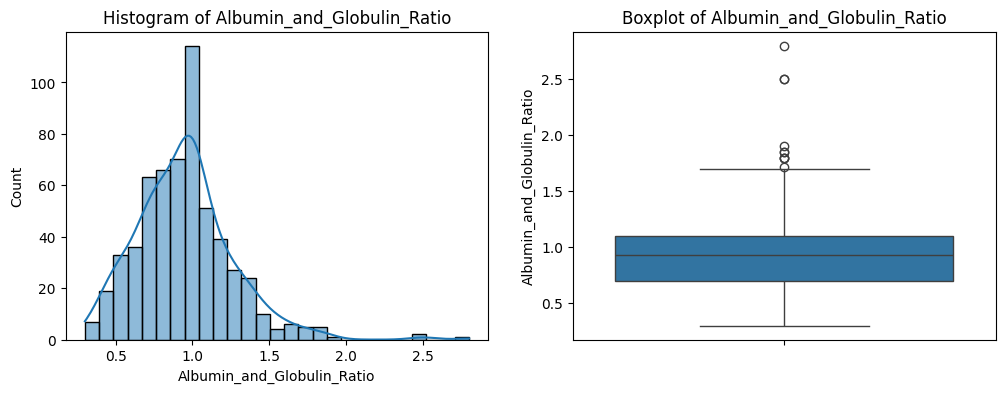

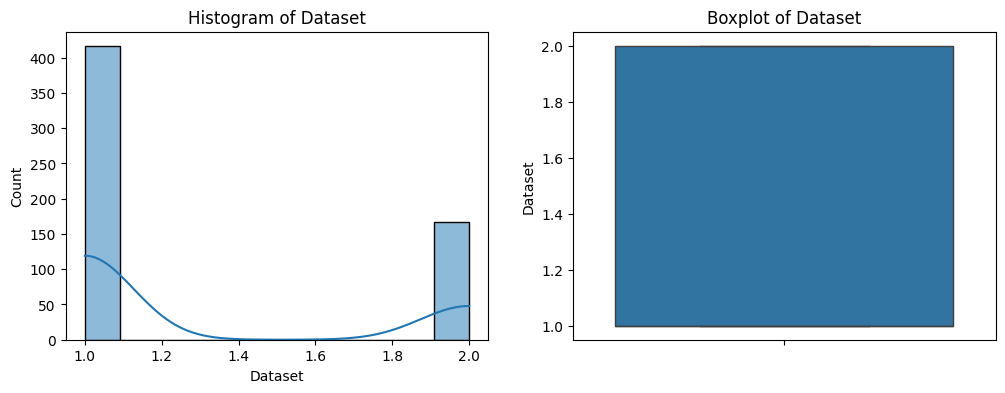

In [ ]:

# Analyze the distribution of each column
for column in liver.columns:
  if liver[column].dtype == 'object':
    # Categorical column, use countplot
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, data=liver)
    plt.title(f'Distribution of {column}')
    plt.show()
  else:
    # Numerical column, use histogram and boxplot
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(liver[column], kde=True)
    plt.title(f'Histogram of {column}')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=column, data=liver)
    plt.title(f'Boxplot of {column}')

    plt.show()


 **Check Label distribution of categorical Data**

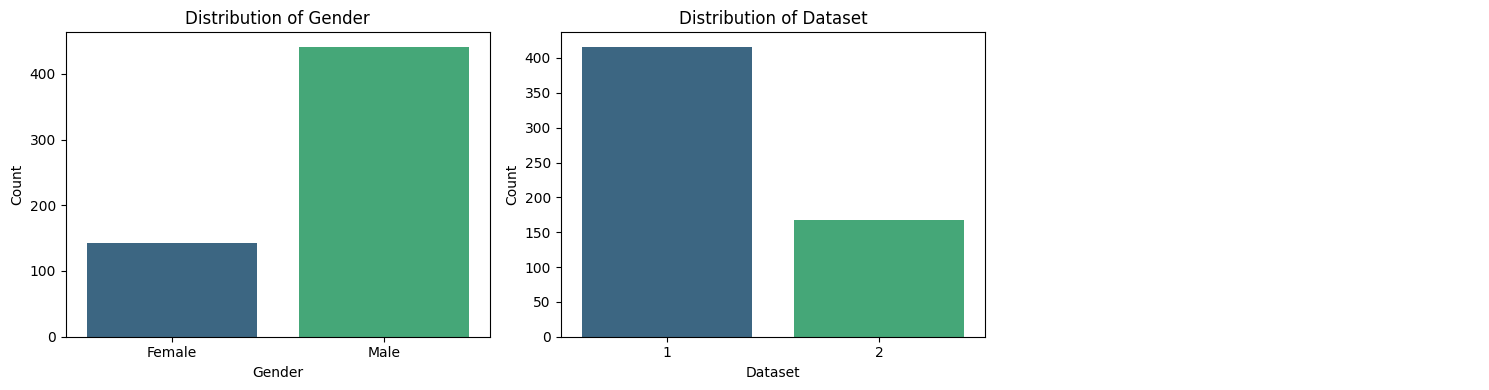

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'liver' is your DataFrame

# List of categorical columns
categorical_features = ['Gender', 'Dataset']

# Set up the number of rows and columns for subplots
num_features = len(categorical_features)
num_cols = 3  # You can adjust this for more or fewer columns
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate


# Generate count plots for each categorical feature
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=liver, ax=axes[i], palette='viridis')  # Use 'viridis' palette for colors
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')


# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


 **perform** **correlation** **between** **features** **for** **our** **dataset**

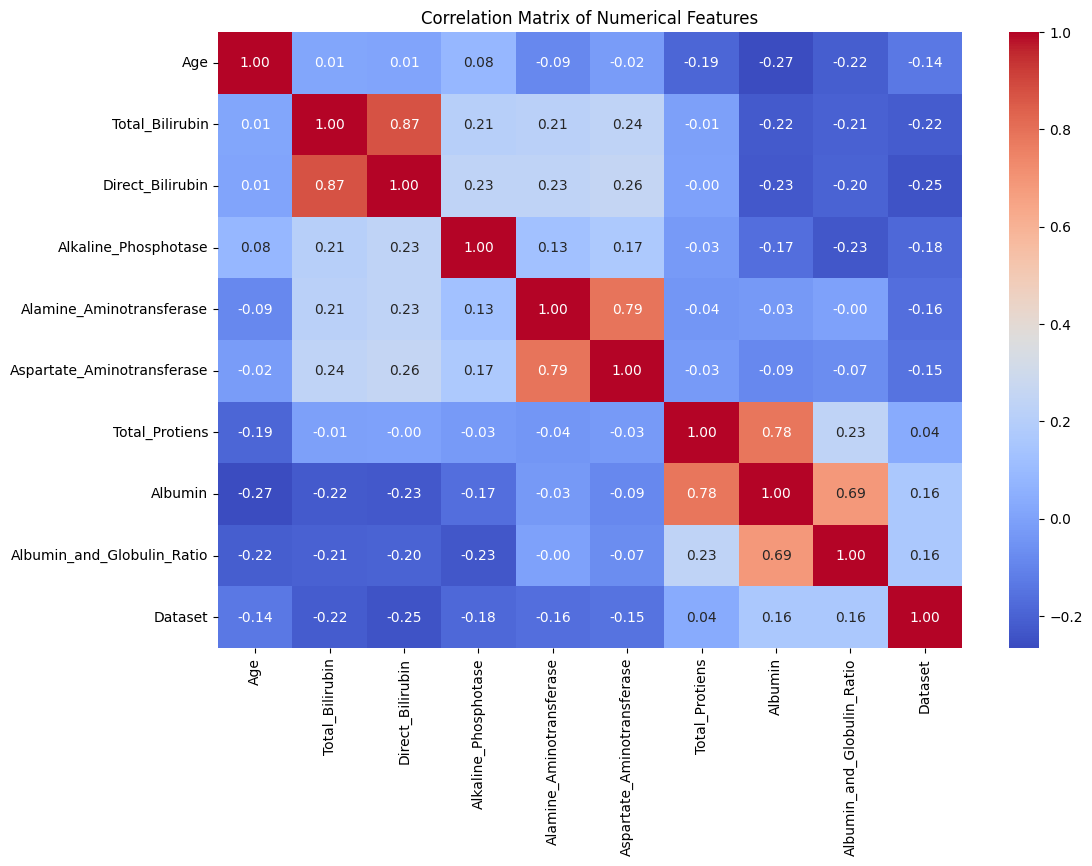

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical features for correlation analysis
numerical_features = liver.select_dtypes(include=['number']).columns

# Calculate the correlation matrix for numerical features
correlation_matrix = liver[numerical_features].corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Relationship between Total Proteins and Albumin**

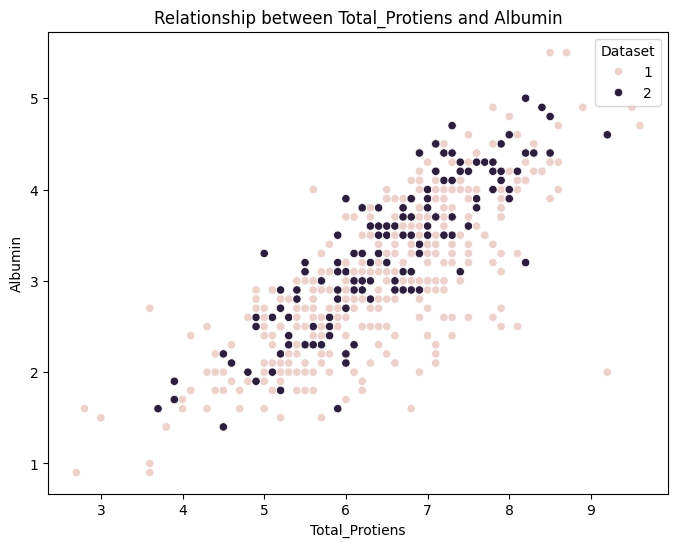

In [ ]:


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total_Protiens', y='Albumin', data=liver, hue='Dataset')
plt.title('Relationship between Total_Protiens and Albumin')
plt.xlabel('Total_Protiens')
plt.ylabel('Albumin')
plt.show()


**# Assuming 'Dataset' column represents whether a patient has liver disease (1) or not (2).
and 'Total_Protiens' is the column containing the red blood cell count.**

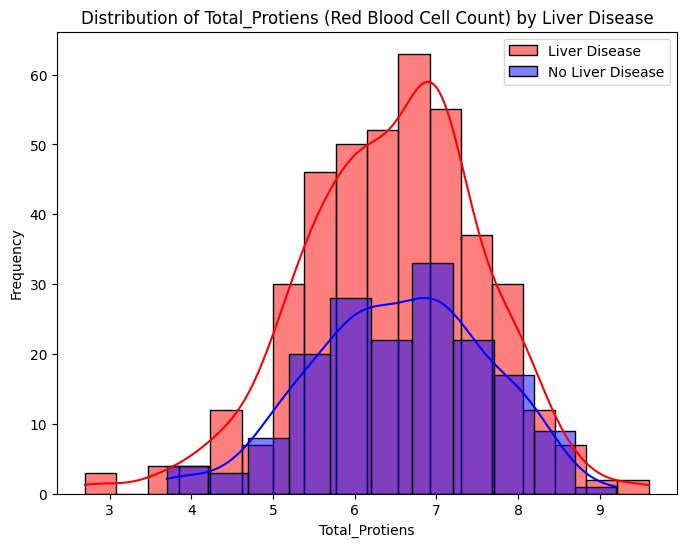

In [ ]:


# Assuming 'Dataset' column represents whether a patient has liver disease (1) or not (2).
# and 'Total_Protiens' is the column containing the red blood cell count.

plt.figure(figsize=(8, 6))
sns.histplot(liver[liver['Dataset'] == 1]['Total_Protiens'], kde=True, label='Liver Disease', color='red')
sns.histplot(liver[liver['Dataset'] == 2]['Total_Protiens'], kde=True, label='No Liver Disease', color='blue')
plt.title('Distribution of Total_Protiens (Red Blood Cell Count) by Liver Disease')
plt.xlabel('Total_Protiens')
plt.ylabel('Frequency')
plt.legend()
plt.show()


**Handling Missing Values**

In [ ]:


# Assuming 'liver' is your DataFrame

# 1. Identify Missing Values
liver=pd.read_csv('/content/indian_liver_patient (2).csv')
print("Missing Values:")
print(liver.isnull().sum())



Missing Values:
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [ ]:

# 3. Implement the chosen strategy
# Example: Replacing missing values in numerical columns with the median
for column in liver.columns:
  if pd.api.types.is_numeric_dtype(liver[column]):
    liver[column].fillna(liver[column].median(), inplace=True)


# Example: Replacing missing values in categorical columns with the mode
for column in liver.columns:
  if pd.api.types.is_string_dtype(liver[column]):
    liver[column].fillna(liver[column].mode()[0], inplace=True)

# 4. Verify that Missing Values Are Handled
print("\nMissing Values After Handling:")
print(liver.isnull().sum())



Missing Values After Handling:
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


**Performing the Feature Encoding**

In [ ]:

# Machine learning models can only work with numerical values. For this reason, it is necessary to transform the categorical values of the relevant features into numerical ones. This process is called feature encoding.

# Assuming 'liver' is your DataFrame and 'Gender' is the categorical column you want to encode.

# Perform one-hot encoding using pandas' get_dummies() function
liver = pd.get_dummies(liver, columns=['Gender'], prefix=['Gender'])

# Display the updated DataFrame to see the new encoded columns
print(liver.head())


   Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65              0.7               0.1                   187   
1   62             10.9               5.5                   699   
2   62              7.3               4.1                   490   
3   58              1.0               0.4                   182   
4   72              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  Gender_Female  Gender_Male  
0      3.3                        0.90        1           True      

**  **Label** **Encoding**  ---> **Because** **there** **are** **less** **no**. **of** **categories** **in** **each** **column**

In [ ]:


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Assuming 'liver' is your DataFrame and 'Dataset' is the column you want to encode

# Fit the LabelEncoder on the 'Dataset' column
le.fit(liver['Dataset'])

# Transform the 'Dataset' column using the fitted encoder
liver['Dataset'] = le.transform(liver['Dataset'])

# View the updated DataFrame
print(liver.head())


   Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65              0.7               0.1                   187   
1   62             10.9               5.5                   699   
2   62              7.3               4.1                   490   
3   58              1.0               0.4                   182   
4   72              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  Gender_Female  Gender_Male  
0      3.3                        0.90        0           True      

 **Selecting** **important** **features**

In [ ]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd # Import pandas

# Assuming 'X' contains your feature matrix (independent variables) and 'y' contains your target variable
X = liver.drop('Dataset', axis=1)  # Replace 'Dataset' with your actual target column name
y = liver['Dataset']

# Create a SelectKBest object to select the top 10 features based on chi-squared test
bestfeatures = SelectKBest(score_func=chi2, k=10)

# Fit the SelectKBest object to your data and transform the feature matrix
fit = bestfeatures.fit(X, y) # This line caused the error due to NaN values

# Get the scores of each feature
dfscores = pd.DataFrame(fit.scores_)

# Get the feature names
dfcolumns = pd.DataFrame(X.columns)

# Concatenate feature names and scores into a single DataFrame
featureScores = pd.concat([dfcolumns, dfscores], axis=1)

# Assign column names to the DataFrame
featureScores.columns = ['Specs', 'Score']

# Sort the features by their scores in descending order
print(featureScores.nlargest(10, 'Score'))

                         Specs         Score
5   Aspartate_Aminotransferase  10203.328978
4     Alamine_Aminotransferase   6421.919946
3         Alkaline_Phosphotase   4039.855702
1              Total_Bilirubin    329.873827
2             Direct_Bilirubin    187.005784
0                          Age     64.315174
7                      Albumin      3.053371
9                Gender_Female      2.995441
8   Albumin_and_Globulin_Ratio      1.639092
10                 Gender_Male      0.964518


# **MODEL-1** **XG** **BOOST**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import numpy as np

# Load the dataset (assuming 'liver' is already defined)
# liver = pd.read_csv('indian_liver_patient.csv')  # Uncomment if loading from a file

# Define features and target variable
X = liver.drop('Dataset', axis=1)
y = liver['Dataset']

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the XGBoost classifier with default parameters
xgb_classifier = XGBClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid,
                           scoring='accuracy', n_jobs=-1, cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
print("Best Parameters:", grid_search.best_params_)

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix for further insights
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.6}
Accuracy: 0.8263473053892215

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        75
           1       0.88      0.79      0.83        92

    accuracy                           0.83       167
   macro avg       0.83      0.83      0.83       167
weighted avg       0.83      0.83      0.83       167

Confusion Matrix:
[[65 10]
 [19 73]]


**MODEL-2** **LOGISTIC REGRESSION**

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer  # Import SimpleImputer for imputation

# Assuming X and y are defined as your feature matrix and target variable
X = liver.drop('Dataset', axis=1)
y = liver['Dataset']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an imputer to replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7435897435897436

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        87
           1       0.50      0.17      0.25        30

    accuracy                           0.74       117
   macro avg       0.63      0.55      0.55       117
weighted avg       0.70      0.74      0.69       117


Confusion Matrix:
[[82  5]
 [25  5]]


**MODEL-3** **KNN**

In [ ]:
# prompt: perform the k nearest neighbors algorithm for the given dataset with more accuracy

# Assuming 'liver' DataFrame is already loaded and preprocessed

# Define features and target variable
X = liver.drop('Dataset', axis=1)
y = liver['Dataset']

# Impute missing values before applying SMOTE
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
X = imputer.fit_transform(X) # Fit and transform on X


# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

# Define hyperparameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best KNN model
best_knn_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_knn = best_knn_model.predict(X_test)

# Evaluate the model's accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
KNN Accuracy: 0.7724550898203593

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74        75
           1       0.78      0.82      0.80        92

    accuracy                           0.77       167
   macro avg       0.77      0.77      0.77       167
weighted avg       0.77      0.77      0.77       167

KNN Confusion Matrix:
[[54 21]
 [17 75]]


**MODEL-4** **DECISION TREE**

In [ ]:


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Assuming 'liver' DataFrame is already loaded and preprocessed

# Define features and target variable
X = liver.drop('Dataset', axis=1)
y = liver['Dataset']

# Impute missing values before applying SMOTE
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
X = imputer.fit_transform(X) # Fit and transform on X


# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
print("Best Parameters:", grid_search.best_params_)

# Train the model with the best parameters
best_dt_model = grid_search.best_estimator_
best_dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = best_dt_model.predict(X_test)

# Evaluate the model's accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Print classification report and confusion matrix for further insights
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Accuracy: 0.8323353293413174

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        75
           1       0.85      0.85      0.85        92

    accuracy                           0.83       167
   macro avg       0.83      0.83      0.83       167
weighted avg       0.83      0.83      0.83       167

Decision Tree Confusion Matrix:
[[61 14]
 [14 78]]


**MODEL-5** **ANN**

In [ ]:


# Assuming 'liver' DataFrame is already loaded and preprocessed

# Define features and target variable
X = liver.drop('Dataset', axis=1)
y = liver['Dataset']

# Impute missing values before applying SMOTE
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
X = imputer.fit_transform(X) # Fit and transform on X


# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Import necessary libraries for ANN
from tensorflow import keras
from tensorflow.keras import layers

# Define the ANN model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Make predictions on the test set
y_pred_ann = (model.predict(X_test) > 0.5).astype("int32")

# Print classification report and confusion matrix for further insights
print("\nANN Classification Report:")
print(classification_report(y_test, y_pred_ann))

print("ANN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ann))


Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6180 - loss: 0.6533 - val_accuracy: 0.7313 - val_loss: 0.5695
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6867 - loss: 0.6056 - val_accuracy: 0.7015 - val_loss: 0.5369
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6872 - loss: 0.5877 - val_accuracy: 0.7015 - val_loss: 0.5154
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7217 - loss: 0.5560 - val_accuracy: 0.7313 - val_loss: 0.5031
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7585 - loss: 0.5272 - val_accuracy: 0.7164 - val_loss: 0.4931
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7418 - loss: 0.5481 - val_accuracy: 0.7164 - val_loss: 0.4940
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7411 - loss: 0.5436 - val_accuracy: 0.7313 - val_loss: 0.4891
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7582 - loss: 0.5061 - val_accuracy: 0.7612 - val_loss

**MODEL-5** **SVM**

In [ ]:


# Assuming 'liver' DataFrame is already loaded and preprocessed

# Define features and target variable
X = liver.drop('Dataset', axis=1)
y = liver['Dataset']

# Impute missing values before applying SMOTE
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
X = imputer.fit_transform(X) # Fit and transform on X


# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


from sklearn.svm import SVC

# Initialize the SVM classifier with default parameters
svm_classifier = SVC(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto', 0.1, 1]  # Kernel coefficient
}

grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
print("Best Parameters:", grid_search.best_params_)

# Train the model with the best parameters
best_svm_model = grid_search.best_estimator_
best_svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate the model's accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Print classification report and confusion matrix for further insights
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVM Accuracy: 0.7485029940119761

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73        75
           1       0.79      0.74      0.76        92

    accuracy                           0.75       167
   macro avg       0.75      0.75      0.75       167
weighted avg       0.75      0.75      0.75       167

SVM Confusion Matrix:
[[57 18]
 [24 68]]


**MODEL-6** **NAIVE BAYES**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer  # Import ColumnTransformer
from sklearn.pipeline import Pipeline  # Import Pipeline

# Load your dataset here (replace 'your_dataset.csv' with the actual file path)
liver = pd.read_csv('/content/indian_liver_patient (2).csv') # Load the dataset into 'liver' variable

# Define features and target variable
X = liver.drop('Dataset', axis=1)
y = liver['Dataset']

# Create a ColumnTransformer to apply different preprocessing to different columns
# Numerical features will be imputed with the mean and scaled
# Categorical features will be one-hot encoded
numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

# Fit and transform the data using the preprocessor
X = preprocessor.fit_transform(X)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)


from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

# Print classification report and confusion matrix for further insights
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.7425149700598802

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.43      0.60        75
           2       0.68      1.00      0.81        92

    accuracy                           0.74       167
   macro avg       0.84      0.71      0.70       167
weighted avg       0.82      0.74      0.72       167

Naive Bayes Confusion Matrix:
[[32 43]
 [ 0 92]]


**MODEL-7** **Gradient Boosting**

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import randint

# Assuming 'liver' DataFrame is already loaded and preprocessed
liver = pd.read_csv('/content/indian_liver_patient (2).csv') # Load the dataset into 'liver' variable
# Step 1: Define features and target variable
X = liver.drop('Dataset', axis=1)
y = liver['Dataset']


# Step 2: Create a ColumnTransformer to handle numerical and categorical features separately
# Numerical features will be imputed with the mean and scaled
# Categorical features will be one-hot encoded
numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Use most_frequent for categorical
            ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Fit and transform the data using the preprocessor
X = preprocessor.fit_transform(X)

# Step 3: Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Step 5: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Step 7: Hyperparameter tuning using RandomizedSearchCV for Gradient Boosting
gb_classifier = GradientBoostingClassifier(random_state=42)

param_dist_gb = {
    'n_estimators': randint(100, 500),
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': randint(3, 20),
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

random_search_gb = RandomizedSearchCV(estimator=gb_classifier,
                                      param_distributions=param_dist_gb,
                                      n_iter=50, cv=5, verbose=1, random_state=42, n_jobs=-1)
random_search_gb.fit(X_train, y_train)

# Step 8: Make predictions on the test set
y_pred_gb = random_search_gb.best_estimator_.predict(X_test)


# Step 10: Evaluate Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("\nGradient Boosting Accuracy after tuning:", accuracy_gb)
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Gradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))


Fitting 5 folds for each of 50 candidates, totalling 250 fits

Gradient Boosting Accuracy after tuning: 0.8383233532934131

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.83      0.82        75
           2       0.86      0.85      0.85        92

    accuracy                           0.84       167
   macro avg       0.84      0.84      0.84       167
weighted avg       0.84      0.84      0.84       167

Gradient Boosting Confusion Matrix:
[[62 13]
 [14 78]]


**MODEL-8** **Random Forest**

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           n_informative=10, n_redundant=5, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define a refined parameter distribution for Randomized Search
param_dist_rf = {
    'n_estimators': np.arange(1000, 1500, 50),  # Higher values for better performance
    'max_depth': np.arange(25, 50, 5),          # Increased depth range
    'min_samples_split': [2, 3],                # Small range
    'min_samples_leaf': [1],                    # Focus on 1 leaf for more splits
    'max_features': ['sqrt'],                   # Use 'sqrt' as it works well for classification
    'bootstrap': [True],                        # Keep bootstrap as True
    'class_weight': ['balanced'],               # Handle class imbalance
    'criterion': ['gini'],                      # Use Gini criterion
    'max_samples': np.linspace(0.9, 1.0, 5)     # Narrow range for sampling
}

# Set up Randomized Search with cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Use StratifiedKFold for balanced splits

search = RandomizedSearchCV(rf, param_distributions=param_dist_rf,
                            n_iter=200, cv=cv, n_jobs=-1, random_state=42)

# Fit the model on the training set
search.fit(X_train, y_train)

# Evaluate on the test set
y_test_pred = search.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracy and classification report
print(f'Random Forest Accuracy: {test_accuracy:.2%}')
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Optionally, print the best hyperparameters found by RandomizedSearchCV
print("Best Hyperparameters:")
print(search.best_params_)


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Random Forest Accuracy: 92.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       102
           1       0.89      0.95      0.92        98

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200

Best Hyperparameters:
{'n_estimators': 1350, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_samples': 0.975, 'max_features': 'sqrt', 'max_depth': 40, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True}


**Model-9 Combining SVM and Logistic Regression using stacking in ensemble learning**

Stacking Classifier Accuracy for SVM and Logistic Regression: 95.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       102
           1       0.95      0.95      0.95        98

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



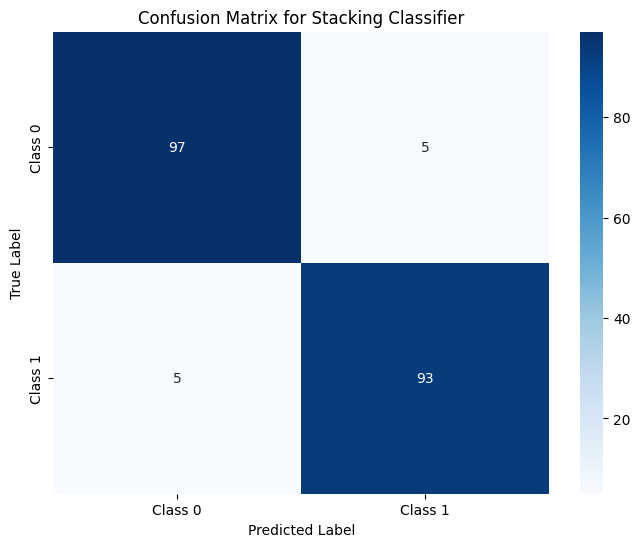

In [ ]:
import numpy as np
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           n_informative=10, n_redundant=5, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for better performance (important for SVM and Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameters for tuning
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

param_grid_logistic = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

# Base models with hyperparameter tuning
svm_model = GridSearchCV(SVC(probability=True, random_state=42), param_grid_svm, cv=5)
logistic_model = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid_logistic, cv=5)

# Fit the base models with hyperparameter tuning
svm_model.fit(X_train, y_train)
logistic_model.fit(X_train, y_train)

# Define base models
base_models = [
    ('svm', svm_model.best_estimator_),
    ('logistic', logistic_model.best_estimator_)
]

# Define the meta-learner (final classifier)
meta_learner = LogisticRegression(random_state=42)

# Create a stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_learner, cv=5)

# Train the Stacking Classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = stacking_classifier.predict(X_test)

# Evaluate the model
stacking_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Stacking Classifier Accuracy for SVM and Logistic Regression: {stacking_accuracy:.2%}')
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for Stacking Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


**Finally Combining SVM and Logistic Regression using stacking in ensemble learning acheives High accuracy of 95%**